# **Pre-pruning**

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}


# this will generate a random multi-label dataset
X, y = make_classification(
    n_samples=1000, # 1000 observations 
    n_features=5, # 5 total features
    n_informative=3, # 3 'useful' features
    n_classes=2, # binary target/label 
    random_state=999 # if you want the same results as mine
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
                  
clf = DecisionTreeClassifier(random_state=42)
grid_cv = GridSearchCV(clf, param_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ", roc_auc_score(y_test, grid_cv.predict(X_test)))

Param for GS {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
CV score for GS 0.9027693445396672
Train AUC ROC Score for GS:  0.8800156746209926
Test AUC ROC Score for GS:  0.779990221787635


# **Post-Pruning**

[0.         0.00125    0.00126984 0.00130952 0.00134921 0.00135714
 0.00137363 0.00141383 0.00154784 0.00181425 0.00190476 0.00190476
 0.00214286 0.00214286 0.00221612 0.00228571 0.00234416 0.00246281
 0.0025     0.00264039 0.00266667 0.00277922 0.00331777 0.00333321
 0.00380952 0.00382653 0.00426444 0.00428571 0.00448494 0.00463235
 0.00534562 0.00543529 0.00783673 0.00825188 0.01070599 0.01999332
 0.03166737 0.04028684 0.04831998 0.06022419]


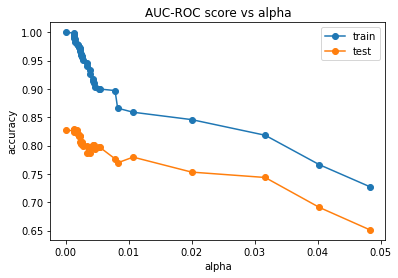

In [2]:
# Allow a decision tree to grow to its full depth
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# compute ccp_alpha values
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

# train DT classifier for each ccp_alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Plot train and test score for each of the above trained model    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [roc_auc_score(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [roc_auc_score(y_test, clf.predict(X_test)) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("AUC-ROC score vs alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.show()

# **Random forest**

In [3]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}


# this will generate a random multi-label dataset
X, y = make_classification(
    n_samples=1000, # 1000 observations 
    n_features=5, # 5 total features
    n_informative=3, # 3 'useful' features
    n_classes=2, # binary target/label 
    random_state=999 # if you want the same results as mine
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
                  


clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42,
                       verbose=0, warm_start=False)


grid_cv = GridSearchCV(clf, param_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(X_train, y_train)



print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ", roc_auc_score(y_test, grid_cv.predict(X_test)))


Param for GS {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
CV score for GS 0.928015131938594
Train AUC ROC Score for GS:  0.9541354058665535
Test AUC ROC Score for GS:  0.8264811769411975


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


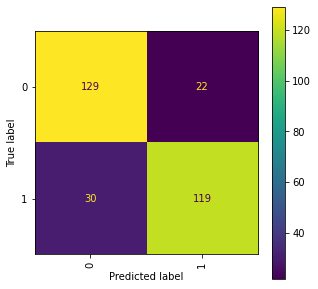

Accuracy  0.8266666666666667
Precision  0.8439716312056738
Sensitivity_recall  0.7986577181208053
Specificity  0.8543046357615894
F1_score  0.8206896551724137


In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred= grid_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(5,5))
display.plot(ax=ax, xticks_rotation='vertical')
plt.show()

"""
True Negative (Top-Left Quadrant)
False Positive (Top-Right Quadrant)
False Negative (Bottom-Left Quadrant)
True Positive (Bottom-Right Quadrant)
"""
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
print("Accuracy ",Accuracy)
print("Precision ",Precision)
print("Sensitivity_recall ",Sensitivity_recall)
print("Specificity ",Specificity)
print("F1_score ",F1_score)

# **Decison Tree**

In [5]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}


# this will generate a random multi-label dataset
X, y = make_classification(
    n_samples=1000, # 1000 observations 
    n_features=5, # 5 total features
    n_informative=3, # 3 'useful' features
    n_classes=2, # binary target/label 
    random_state=999 # if you want the same results as mine
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
                  


clf = DecisionTreeClassifier(random_state=42)
grid_cv = GridSearchCV(clf, param_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(X_train, y_train)



print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ", roc_auc_score(y_test, grid_cv.predict(X_test)))


Param for GS {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
CV score for GS 0.9027693445396672
Train AUC ROC Score for GS:  0.8800156746209926
Test AUC ROC Score for GS:  0.779990221787635


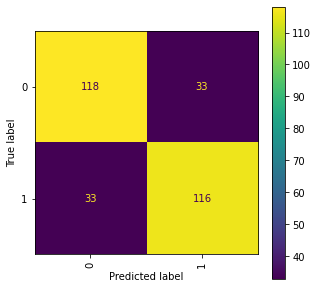

Accuracy  0.78
Precision  0.7785234899328859
Sensitivity_recall  0.7785234899328859
Specificity  0.7814569536423841
F1_score  0.7785234899328859


In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred= grid_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(5,5))
display.plot(ax=ax, xticks_rotation='vertical')
plt.show()

"""
True Negative (Top-Left Quadrant)
False Positive (Top-Right Quadrant)
False Negative (Bottom-Left Quadrant)
True Positive (Bottom-Right Quadrant)
"""
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
print("Accuracy ",Accuracy)
print("Precision ",Precision)
print("Sensitivity_recall ",Sensitivity_recall)
print("Specificity ",Specificity)
print("F1_score ",F1_score)